## Implementing K-Means in Python

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


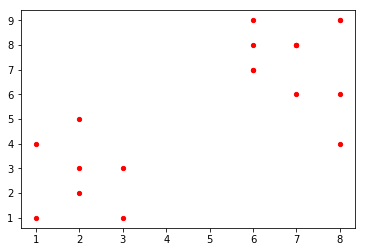

In [2]:
df = pd.read_csv("kmeans.csv")
plt.scatter(df['x'],df['y'], c='r', s=18)


[[1. 6.]
 [1. 4.]
 [4. 4.]]


Text(0,0.5,'y')

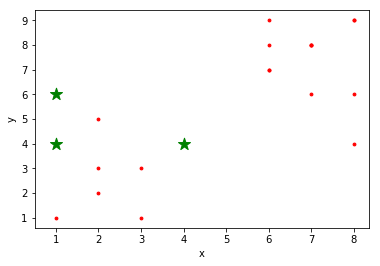

In [3]:
#---let k assume a value---
k = 3

#---create a matrix containing all points---
X = np.array(list(zip(df['x'],df['y'])))

#---generate k random points (centroids)---
Cx = np.random.randint(np.min(X[:,0]), np.max(X[:,0]), size = k)
Cy = np.random.randint(np.min(X[:,1]), np.max(X[:,1]), size = k)

#---represent the k centroids as a matrix---
C = np.array(list(zip(Cx, Cy)), dtype=np.float64)
print(C)

#---plot the orginal points as well as the k centroids---
plt.scatter(df['x'], df['y'], c='r', s=8)
plt.scatter(Cx, Cy, marker='*', c='g', s=160)
plt.xlabel("x")
plt.ylabel("y")


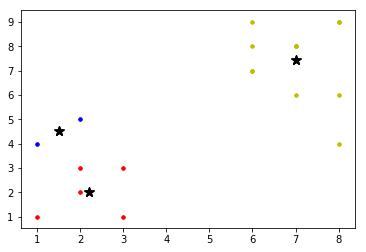

In [4]:
from copy import deepcopy

#---to calculate the distance between two points---
def euclidean_distance(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

#---create a matrix of 0 with same dimension as C (centroids)---
C_prev = np.zeros(C.shape)

#---to store the cluster each point belongs to---
clusters = np.zeros(len(X))

#---C is the random centroids and C_prev is all 0s---
#---measure the distance between the centroids and C_prev---
distance_differences = euclidean_distance(C, C_prev)

#---loop as long as there is still a difference in
# distance between the previous and current centroids---
while distance_differences.any() != 0:
    #---assign each value to its closest cluster---
    for i in range(len(X)):
        distances = euclidean_distance(X[i], C)

        #---returns the indices of the minimum values along an axis---
        cluster = np.argmin(distances)
        clusters[i] = cluster

    #---store the prev centroids---
    C_prev = deepcopy(C)

    #---find the new centroids by taking the average value---
    for i in range(k):  #---k is the number of clusters---
        #---take all the points in cluster i---
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        if len(points) != 0:
            C[i] = np.mean(points, axis=0)

    #---find the distances between the old centroids and the new centroids---
    distance_differences = euclidean_distance(C, C_prev)

#---plot the scatter plot---
colors = ['b','r','y','g','c','m']
for i in range(k):
    points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
    if len(points) > 0:
        plt.scatter(points[:, 0], points[:, 1], s=10, c=colors[i])
    else:
        # this means that one of the clusters has no points
        print("Plesae regenerate your centroids again.")

    plt.scatter(points[:, 0], points[:, 1], s=10, c=colors[i])
    plt.scatter(C[:, 0], C[:, 1], marker='*', s=100, c='black')


In [5]:
for i, cluster in enumerate(clusters):
    print("Point " + str(X[i]),
          "Cluster " + str(int(cluster)))


Point [1 1] Cluster 1
Point [2 2] Cluster 1
Point [2 3] Cluster 1
Point [1 4] Cluster 0
Point [3 3] Cluster 1
Point [6 7] Cluster 2
Point [7 8] Cluster 2
Point [6 8] Cluster 2
Point [7 6] Cluster 2
Point [6 9] Cluster 2
Point [2 5] Cluster 0
Point [7 8] Cluster 2
Point [8 9] Cluster 2
Point [6 7] Cluster 2
Point [7 8] Cluster 2
Point [3 1] Cluster 1
Point [8 4] Cluster 2
Point [8 6] Cluster 2
Point [8 9] Cluster 2


In [6]:
print(C)


[[1.5        4.5       ]
 [2.2        2.        ]
 [7.         7.41666667]]


## Using K-Means in Scikit-learn

In [7]:
#---using sci-kit-learn---
from sklearn.cluster import KMeans
k = 3
kmeans = KMeans(n_clusters=k)


In [8]:
kmeans = kmeans.fit(X)


In [9]:
labels = kmeans.predict(X)


In [10]:
centroids = kmeans.cluster_centers_


In [11]:
print(labels)
print(centroids)


[0 0 0 0 0 2 2 2 1 2 0 2 2 2 2 0 1 1 2]
[[2.         2.71428571]
 [7.66666667 5.33333333]
 [6.77777778 8.11111111]]


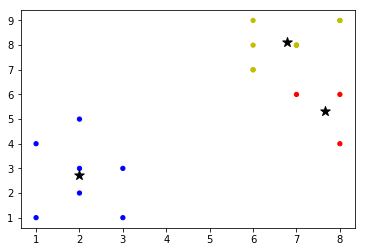

In [12]:
#---map the labels to colors---
c = ['b','r','y','g','c','m']
colors = [c[i] for i in labels]

plt.scatter(df['x'],df['y'], c=colors, s=18)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=100, c='black')


In [13]:
#---making predictions---
cluster = kmeans.predict([[3,4]])[0]
print(c[cluster])  # r

cluster = kmeans.predict([[7,5]])[0]
print(c[cluster])  # y


b
r


## Evaluating Cluster Size Using the Silhouette Coefficient

### Calculating the Silhouette Coefficient

In [14]:
from sklearn import metrics

silhouette_samples = metrics.silhouette_samples(X, kmeans.labels_)
print(silhouette_samples)

print("Average of Silhouette Coefficients for k =", k)
print("============================================")
print("Silhouette mean:", silhouette_samples.mean())


[0.67534567 0.73722797 0.73455072 0.66254937 0.6323039  0.33332111
 0.63792468 0.58821402 0.29141777 0.59137721 0.50802377 0.63792468
 0.52511161 0.33332111 0.63792468 0.60168807 0.51664787 0.42831295
 0.52511161]
Average of Silhouette Coefficients for k = 3
Silhouette mean: 0.5578051985195768


### Finding the Optimal K

Silhouette Coefficients for k = 2 is 0.6897112069939448
Silhouette Coefficients for k = 3 is 0.5578051985195768
Silhouette Coefficients for k = 4 is 0.4430381814640289
Silhouette Coefficients for k = 5 is 0.45599458528403614
Silhouette Coefficients for k = 6 is 0.35920270531645576
Silhouette Coefficients for k = 7 is 0.3784739284988503
Silhouette Coefficients for k = 8 is 0.3823293267384373
Silhouette Coefficients for k = 9 is 0.4477506360741836
Silhouette Coefficients for k = 10 is 0.5045189355982561
Silhouette Coefficients for k = 11 is 0.4695564671186216
Silhouette Coefficients for k = 12 is 0.4409831398126504
Silhouette Coefficients for k = 13 is 0.4255677072435213
Silhouette Coefficients for k = 14 is 0.383836485200708
Silhouette Coefficients for k = 15 is 0.3684210526315789
Silhouette Coefficients for k = 16 is 0.3684210526315789
Silhouette Coefficients for k = 17 is 0.3684210526315789
Silhouette Coefficients for k = 18 is 0.3684210526315789
Optimal K is  2


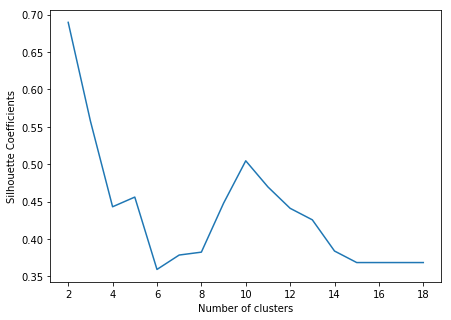

In [15]:
silhouette_avgs = []
min_k = 2

#---try k from 2 to maximum number of labels---
for k in range(min_k, len(X)):
    kmean = KMeans(n_clusters=k).fit(X)
    score = metrics.silhouette_score(X, kmean.labels_)
    print("Silhouette Coefficients for k =", k, "is", score)
    silhouette_avgs.append(score)

f, ax = plt.subplots(figsize=(7, 5))
ax.plot(range(min_k, len(X)), silhouette_avgs)

plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Coefficients")

#---the optimal k is the one with the highest average silhouette---
Optimal_K = silhouette_avgs.index(max(silhouette_avgs)) + min_k
print("Optimal K is ", Optimal_K)


# Using K-Means to Solve Real-Life Problems

## Importing the Data

In [16]:
%matplotlib inline
import numpy as np
import pandas as pd

df = pd.read_csv("BMX_G.csv")


In [17]:
print(df.shape)


(9338, 27)


## Cleaning the Data

In [18]:
df.isnull().sum()

Unnamed: 0       0
seqn             0
bmdstats         0
bmxwt           95
bmiwt         8959
bmxrecum      8259
bmirecum      9307
bmxhead       9102
bmihead       9338
bmxht          723
bmiht         9070
bmxbmi         736
bmdbmic       5983
bmxleg        2383
bmileg        8984
bmxarml        512
bmiarml       8969
bmxarmc        512
bmiarmc       8965
bmxwaist      1134
bmiwaist      8882
bmxsad1       2543
bmxsad2       2543
bmxsad3       8940
bmxsad4       8940
bmdavsad      2543
bmdsadcm      8853
dtype: int64

In [19]:
df = df.dropna(subset=['bmxleg','bmxwaist'])  # remove rows with NaNs
print(df.shape)


(6899, 27)


## Plotting the Scatter Plot

Text(0,0.5,'Waist Circumference (cm)')

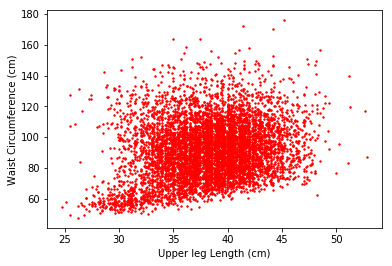

In [20]:
import matplotlib.pyplot as plt

plt.scatter(df['bmxleg'],df['bmxwaist'], c='r', s=2)
plt.xlabel("Upper leg Length (cm)")
plt.ylabel("Waist Circumference (cm)")


## Clustering Using K-Means

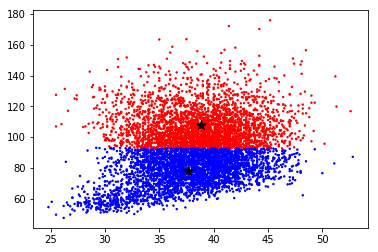

In [21]:
#---using sci-kit-learn---
from sklearn.cluster import KMeans

k = 2
X = np.array(list(zip(df['bmxleg'],df['bmxwaist'])))

kmeans = KMeans(n_clusters=k)
kmeans = kmeans.fit(X)
labels = kmeans.predict(X)
centroids = kmeans.cluster_centers_

#---map the labels to colors---
c = ['b','r','y','g','c','m']
colors = [c[i] for i in labels]

plt.scatter(df['bmxleg'],df['bmxwaist'], c=colors, s=2)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=100, c='black')


In [22]:
print(centroids)


[[ 37.65634338  77.84737843]
 [ 38.81939093 107.92420758]]


## Finding the Optimal Size Classes

In [23]:
from sklearn import metrics

silhouette_avgs = []
min_k = 2

#---try k from 2 to maximum number of labels---
for k in range(min_k, 10):
    kmean = KMeans(n_clusters=k).fit(X)
    score = metrics.silhouette_score(X, kmean.labels_)
    print("Silhouette Coefficients for k =", k, "is", score)
    silhouette_avgs.append(score)

#---the optimal k is the one with the highest average silhouette---
Optimal_K = silhouette_avgs.index(max(silhouette_avgs)) + min_k
print("Optimal K is", Optimal_K)


Silhouette Coefficients for k = 2 is 0.5167236216074348
Silhouette Coefficients for k = 3 is 0.47226905068761915
Silhouette Coefficients for k = 4 is 0.43610244664383013
Silhouette Coefficients for k = 5 is 0.4190585496067802
Silhouette Coefficients for k = 6 is 0.39301684819084287
Silhouette Coefficients for k = 7 is 0.3783966650081182
Silhouette Coefficients for k = 8 is 0.35850534367009584
Silhouette Coefficients for k = 9 is 0.3417526499717664
Optimal K is 2


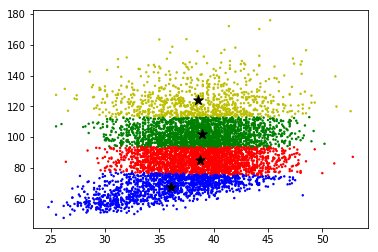

In [24]:
k = 4
X = np.array(list(zip(df['bmxleg'],df['bmxwaist'])))

kmeans = KMeans(n_clusters=k)
kmeans = kmeans.fit(X)
labels = kmeans.predict(X)
centroids = kmeans.cluster_centers_

#---map the labels to colors---
c = ['b','r','y','g','c','m']
colors = [c[i] for i in labels]

plt.scatter(df['bmxleg'],df['bmxwaist'], c=colors, s=2)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=100, c='black')
